In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import colors

In [2]:
df = pd.read_csv('../../preprocessing/apartments_preprocessed.csv')

In [3]:
df['turbulent'] = 0
df['family-friendly'] = 0
df['nature-lovely'] = 0

# washington dc, massachusets, utah, illinois, minnessota, oregon, wisconsin, virginia, colombia
turbulent_class = ['WA','DC','MA','UT','IL','MN', 'OR', 'WI', 'VA','CO', 'NY', 'CT', 'NE']

#massachusetts,minnesota, north dakota, vermont, new hampshire, new jersey, iowa, washington
family_friendly_class = ['MA','MN','ND','VT','NH','NJ', 'NE','IA', 'CT', 'WA']

#california, alaska, utah, colorado, hawaii, arizona, washington, wyoming, massachusetts, florida, oregon, montana, north carolina
nature_lovely_class = ['CA', 'AK', 'UT', 'CO', 'HI', 'AZ', 'WA', 'WY', 'MA', 'FL', 'OR', 'MT', 'NC']


df.loc[df['state'].isin(turbulent_class), 'turbulent'] = 1
df.loc[df['state'].isin(family_friendly_class), 'family-friendly'] = 1
df.loc[df['state'].isin(nature_lovely_class), 'nature-lovely'] = 1

In [4]:
X = pd.DataFrame(data=df, columns=['price','square_meters','luxury','turbulent','family-friendly','nature-lovely','longitude','latitude'])
X
feature_names = ['price','square_meters','luxury','turbulent','family-friendly','nature-lovely','longitude','latitude']

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X

,price,square_meters,luxury,turbulent,family-friendly,nature-lovely,longitude,latitude
0,0.023790,0.000000,0.0,1.0,0.0,0.0,0.922641,0.436714
1,0.009073,0.000446,0.0,0.0,0.0,0.0,0.801088,0.413434
2,0.047984,0.000535,0.0,1.0,0.0,0.0,0.921553,0.436349
3,0.029234,0.001337,0.0,1.0,1.0,1.0,0.406403,0.652966
4,0.027419,0.002140,0.0,1.0,0.0,0.0,0.921281,0.435922
...,...,...,...,...,...,...,...,...
9917,0.233871,0.552643,0.0,1.0,1.0,0.0,0.736632,0.585536
9918,1.000000,0.768031,0.0,0.0,0.0,1.0,0.437081,0.325673
9919,0.435484,1.000000,0.0,0.0,0.0,0.0,0.919740,0.439768
9920,0.185081,0.059057,1.0,1.0,0.0,0.0,0.956780,0.483039


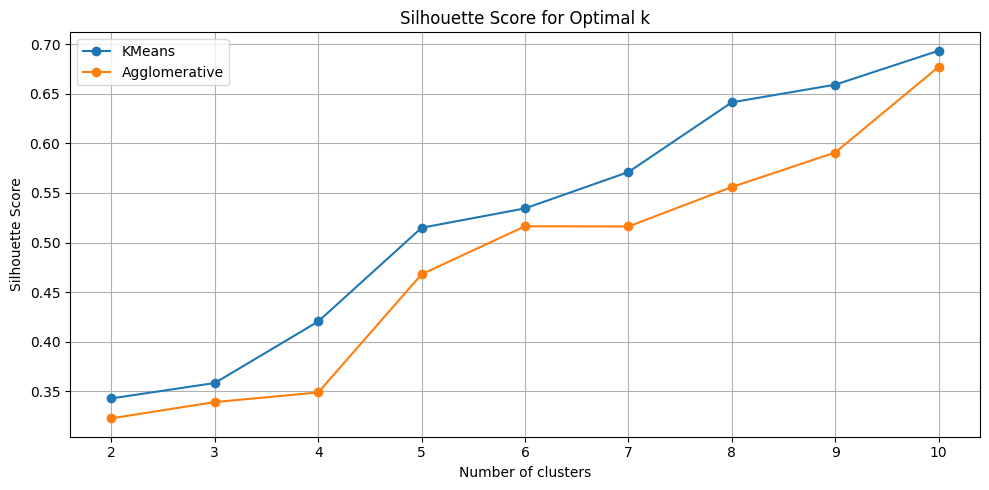

In [7]:
from sklearn.metrics import silhouette_score


silhouette_scores_kmeans = []
silhouette_scores_aggl = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X)

    aggl = AgglomerativeClustering(n_clusters=k, linkage='complete')
    aggl.fit(X)
    
    silhouette_score_k = silhouette_score(X, kmeans.labels_)
    silhouette_scores_kmeans.append(silhouette_score_k)

    silhouette_score_a = silhouette_score(X, aggl.labels_)
    silhouette_scores_aggl.append(silhouette_score_a)


# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores_kmeans, label='KMeans', marker='o')
plt.plot(range(2, 11), silhouette_scores_aggl, label='Agglomerative', marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Kako je veoma tesko uporediti modele na izgled, verovacemo brojkama i kompjuterski izracunatim merama slicnosti da je KMeans najbolji za 6 klastera. Konkretnije odgovore na pitanje 'koji model je bolji' moze dati samo praksa. DBSCAN nije uzet u obzir jer je on sam nasao da optimalan broj klastera = 20 i da mu je silhouette score = 0.83.